In [120]:
# first import the POMDPs.jl interface
using POMDPs
using Plots
# POMDPModelTools has tools that help build the MDP definition
using POMDPModelTools
# POMDPPolicies provides functions to help define simple policies
using POMDPPolicies
# POMDPSimulators provide functions for running MDP simulations
using POMDPSimulators

In [121]:
struct DroneState
    x::Int64 # x position
    y::Int64 # y position
    theta::Float64 # heading angle
    done::Bool # are we in a terminal state?
end

In [122]:
# initial state constructor
DroneState(x::Int64, y::Int64, θ::Float64) = DroneState(x,y,θ,false)
# checks if the position of two states are the same
posequal(s1::DroneState, s2::DroneState) = s1.x == s2.x && s1.y == s2.y && s1.theta == s2.theta


posequal (generic function with 1 method)

In [123]:
# the grid world mdp type
mutable struct DroneEnv <: MDP{DroneState, Symbol}
    size_x::Int64 # x size of the grid
    size_y::Int64 # y size of the grid
    size_theta::Int64 # theta size
    reward_states::Vector{DroneState} # the states in which agent recieves reward
    reward_values::Vector{Float64} # reward values for those states
    tprob::Float64 # probability of transitioning to the desired state
    discount_factor::Float64 # disocunt factor
    target::Vector{Int64}
end

In [124]:
#we use key worded arguments so we can change any of the values we pass in 
function DroneEnv(;sx::Int64=10, # size_x
                   sy::Int64=10, # size_y
                   stheta::Int64=4, # size_theta
                   rs::Vector{DroneState}=[DroneState(10, 10, 0.0), DroneState(10, 10, 1.5707963267948966), DroneState(10, 10, 3.141592653589793), DroneState(10, 10, 4.71238898038469), DroneState(5, 10, 0.0), DroneState(5, 10, 1.5707963267948966), DroneState(5, 10, 3.141592653589793), DroneState(5, 10, 4.71238898038469), DroneState(5, 9, 0.0), DroneState(5, 9, 1.5707963267948966), DroneState(5, 9, 3.141592653589793), DroneState(5, 9, 4.71238898038469), DroneState(10, 9, 0.0), DroneState(10, 9, 1.5707963267948966), DroneState(10, 9, 3.141592653589793), DroneState(10, 9, 4.71238898038469), DroneState(2, 8, 0.0), DroneState(2, 8, 1.5707963267948966), DroneState(2, 8, 3.141592653589793), DroneState(2, 8, 4.71238898038469), DroneState(3, 8, 0.0), DroneState(3, 8, 1.5707963267948966), DroneState(3, 8, 3.141592653589793), DroneState(3, 8, 4.71238898038469), DroneState(10, 8, 0.0), DroneState(10, 8, 1.5707963267948966), DroneState(10, 8, 3.141592653589793), DroneState(10, 8, 4.71238898038469), DroneState(2, 7, 0.0), DroneState(2, 7, 1.5707963267948966), DroneState(2, 7, 3.141592653589793), DroneState(2, 7, 4.71238898038469), DroneState(3, 7, 0.0), DroneState(3, 7, 1.5707963267948966), DroneState(3, 7, 3.141592653589793), DroneState(3, 7, 4.71238898038469), DroneState(10, 7, 0.0), DroneState(10, 7, 1.5707963267948966), DroneState(10, 7, 3.141592653589793), DroneState(10, 7, 4.71238898038469), DroneState(2, 6, 0.0), DroneState(2, 6, 1.5707963267948966), DroneState(2, 6, 3.141592653589793), DroneState(2, 6, 4.71238898038469), DroneState(3, 6, 0.0), DroneState(3, 6, 1.5707963267948966), DroneState(3, 6, 3.141592653589793), DroneState(3, 6, 4.71238898038469), DroneState(6, 6, 0.0), DroneState(6, 6, 1.5707963267948966), DroneState(6, 6, 3.141592653589793), DroneState(6, 6, 4.71238898038469), DroneState(7, 6, 0.0), DroneState(7, 6, 1.5707963267948966), DroneState(7, 6, 3.141592653589793), DroneState(7, 6, 4.71238898038469), DroneState(8, 6, 0.0), DroneState(8, 6, 1.5707963267948966), DroneState(8, 6, 3.141592653589793), DroneState(8, 6, 4.71238898038469), DroneState(9, 6, 0.0), DroneState(9, 6, 1.5707963267948966), DroneState(9, 6, 3.141592653589793), DroneState(9, 6, 4.71238898038469), DroneState(10, 6, 0.0), DroneState(10, 6, 1.5707963267948966), DroneState(10, 6, 3.141592653589793), DroneState(10, 6, 4.71238898038469), DroneState(10, 5, 0.0), DroneState(10, 5, 1.5707963267948966), DroneState(10, 5, 3.141592653589793), DroneState(10, 5, 4.71238898038469), DroneState(10, 4, 0.0), DroneState(10, 4, 1.5707963267948966), DroneState(10, 4, 3.141592653589793), DroneState(10, 4, 4.71238898038469), DroneState(2, 3, 0.0), DroneState(2, 3, 1.5707963267948966), DroneState(2, 3, 3.141592653589793), DroneState(2, 3, 4.71238898038469), DroneState(3, 3, 0.0), DroneState(3, 3, 1.5707963267948966), DroneState(3, 3, 3.141592653589793), DroneState(3, 3, 4.71238898038469), DroneState(2, 2, 0.0), DroneState(2, 2, 1.5707963267948966), DroneState(2, 2, 3.141592653589793), DroneState(2, 2, 4.71238898038469), DroneState(3, 2, 0.0), DroneState(3, 2, 1.5707963267948966), DroneState(3, 2, 3.141592653589793), DroneState(3, 2, 4.71238898038469), DroneState(4, 2, 0.0), DroneState(4, 2, 1.5707963267948966), DroneState(4, 2, 3.141592653589793), DroneState(4, 2, 4.71238898038469), DroneState(5, 2, 0.0), DroneState(5, 2, 1.5707963267948966), DroneState(5, 2, 3.141592653589793), DroneState(5, 2, 4.71238898038469), DroneState(6, 2, 0.0), DroneState(6, 2, 1.5707963267948966), DroneState(6, 2, 3.141592653589793), DroneState(6, 2, 4.71238898038469), DroneState(7, 2, 0.0), DroneState(7, 2, 1.5707963267948966), DroneState(7, 2, 3.141592653589793), DroneState(7, 2, 4.71238898038469)], # reward states
                   rv::Vector{Float64}=[100.0, 100.0, 100.0, 100.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0], # reward values
                   tp::Float64=1.0, # tprob
                   discount_factor::Float64=0.9,
                   target::Vector{Int64}=[10,10])
    return DroneEnv(sx, sy,stheta, rs, rv, tp, discount_factor, target)
end

# we can now create a GridWorld mdp instance like this:
mdp = DroneEnv()
mdp.reward_states # mdp contains all the defualt values from the constructor

108-element Vector{DroneState}:
 DroneState(10, 10, 0.0, false)
 DroneState(10, 10, 1.5707963267948966, false)
 DroneState(10, 10, 3.141592653589793, false)
 DroneState(10, 10, 4.71238898038469, false)
 DroneState(5, 10, 0.0, false)
 DroneState(5, 10, 1.5707963267948966, false)
 DroneState(5, 10, 3.141592653589793, false)
 DroneState(5, 10, 4.71238898038469, false)
 DroneState(5, 9, 0.0, false)
 DroneState(5, 9, 1.5707963267948966, false)
 ⋮
 DroneState(5, 2, 4.71238898038469, false)
 DroneState(6, 2, 0.0, false)
 DroneState(6, 2, 1.5707963267948966, false)
 DroneState(6, 2, 3.141592653589793, false)
 DroneState(6, 2, 4.71238898038469, false)
 DroneState(7, 2, 0.0, false)
 DroneState(7, 2, 1.5707963267948966, false)
 DroneState(7, 2, 3.141592653589793, false)
 DroneState(7, 2, 4.71238898038469, false)

In [125]:
# action space
function POMDPs.states(mdp::DroneEnv)
    s = DroneState[DroneState(-1,-1,0.0)] # initialize an array of GridWorldStates
    # loop over all our states, remeber there are two binary variables:
    # done (d)
    for d = 0:1,theta = 0.0:pi/2:3*pi/2,  y = 1:mdp.size_y, x = 1:mdp.size_x
        push!(s, DroneState(x,y,theta,d))
    end
    return s
end

In [126]:
mdp = DroneEnv()
state_space = states(mdp);
state_space[101]

DroneState(10, 10, 0.0, false)

In [127]:
POMDPs.actions(mdp::DroneEnv) = [:fwd, :bkwd, :l, :r, :ccw, :cw]

In [128]:
# transition helpers
function inbounds(mdp::DroneEnv,x::Int64,y::Int64)
    if 1 <= x <= mdp.size_x && 1 <= y <= mdp.size_y
        return true
    else
        return false
    end
end
inbounds(mdp::DroneEnv, state::DroneState) = inbounds(mdp, state.x, state.y);

In [129]:
function POMDPs.transition(mdp::DroneEnv, state::DroneState, action::Symbol)
    @show state
    a = action
    x = state.x
    y = state.y
    θ = state.theta

    if state.done
        return SparseCat([DroneState(x, y, θ, true)], [1.0])
    elseif state in mdp.reward_states
        return SparseCat([DroneState(x, y, θ, true)], [1.0])
    end

    neighbors = [
        DroneState(x+1, y, θ, false),
        DroneState(x-1, y, θ, false), 
        DroneState(x, y+1, θ, false),
        DroneState(x, y-1, θ, false),
        DroneState(x, y, mod(θ+pi/2,2*pi), false),
        DroneState(x, y, mod(θ-pi/2,2*pi), false)
        ]
    for i in 1:length(neighbors)
        if neighbors[i].x == mdp.target[1] && neighbors[i].y == mdp.target[2]
            neighbors[i] = DroneState(neighbors[i].x, neighbors[i].y, neighbors[i].theta, true)
        end
    end
    if θ == 0.0
        targets = Dict(:fwd=>1, :bkwd=>2, :l=>3, :r=>4, :ccw=>5, :cw=>6)
    elseif θ == pi/2
        targets = Dict(:fwd=>3, :bkwd=>4, :l=>2, :r=>1, :ccw=>5, :cw=>6)
    elseif θ == Float64(pi)
        targets = Dict(:fwd=>2, :bkwd=>1, :l=>4, :r=>3, :ccw=>5, :cw=>6)
    elseif θ == 3*pi/2
        targets = Dict(:fwd=>4, :bkwd=>3, :l=>1, :r=>2, :ccw=>5, :cw=>6)
    end
    target = targets[a]
    
    probability = fill(0.0, 6)
    if !inbounds(mdp, neighbors[target])
        # If would transition out of bounds, stay in
        # same cell with probability 1
        return SparseCat([DroneState(-1, -1, 0.0, true)], [1.0])
    else
        probability[target] = mdp.tprob

        oob_count = sum(!inbounds(mdp, n) for n in neighbors) # number of out of bounds neighbors

        new_probability = (1.0 - mdp.tprob)/(3-oob_count)

        for i = 1:6 # do not include neighbor 5
            if inbounds(mdp, neighbors[i]) && i != target
                probability[i] = new_probability
            end
        end
    end
    
    return SparseCat(neighbors, probability)
end



In [130]:
function POMDPs.reward(mdp::DroneEnv, state::DroneState, action::Symbol, statep::DroneState) #deleted action
    if state.done
        return 0.0
    end
    if state.x==statep.x && state.y==statep.y
        return -10
    end

    r = -1
    n = length(mdp.reward_states)
    for i = 1:n
        if posequal(statep, mdp.reward_states[i])
            r = mdp.reward_values[i]
        elseif !inbounds(mdp, statep)
            r = -1000
        end
    end
    return r
end

In [131]:
POMDPs.discount(mdp::DroneEnv) = mdp.discount_factor;

In [132]:
function POMDPs.stateindex(mdp::DroneEnv, state::DroneState)
    num_x = mdp.size_x
    num_y = mdp.size_y
    num_theta = mdp.size_theta
    if state == DroneState(-1,-1,0.0)
        return 1
    end

    # Define a mapping for theta values to integers
    theta_mapping = Dict(0.0 => 1, Float64(pi)/2 => 2, Float64(pi) => 3, 3*Float64(pi)/2 => 4)

    # Calculate the index based on state variables
    theta_index = theta_mapping[state.theta]
    index = state.x + (state.y - 1) * num_x + (theta_index - 1) * num_x * num_y

    # If the state is terminal, add the size of the non-terminal states
    if state.done
        index += num_x * num_y * num_theta
    end
    return index
end

function POMDPs.actionindex(mdp::DroneEnv, act::Symbol)
    if act==:fwd
        return 1
    elseif act==:bkwd
        return 2
    elseif act==:l
        return 3
    elseif act==:r
        return 4
    elseif act==:ccw
        return 5
    elseif act==:cw
        return 6
    end
    error("Invalid GridWorld action: $act")
end;

In [133]:
POMDPs.isterminal(mdp::DroneEnv, s::DroneState) = s.done

In [134]:
POMDPs.initialstate(pomdp::DroneEnv) = Deterministic(DroneState(1, 1, 0.0)) # TODO: define initialistate for states, not distributions?

In [135]:
# render
function render(mdp::DroneEnv, state::DroneState)
    p = plot(size=(800, 800), xlim=(0, mdp.size_x+1), ylim=(0, mdp.size_y+1), legend=false)
    xticks!(0:0.5:mdp.size_x+1)
    yticks!(0:0.5:mdp.size_y+1)
    for i in 1:length(mdp.reward_states)
        if mdp.reward_values[i] < 1
            plot!([mdp.reward_states[i].x], [mdp.reward_states[i].y], mark=:circle, markersize=20, color=:black)
        end
    end
    plot!(mdp.target[1], mdp.target[2], mark=:star, markersize=20, color=:yellow)
    plot!([state.x], [state.y], mark=:diamond, markersize=20, color=:blue)
    quiver!([state.x], [state.y], quiver=[(0.5*cos(state.theta), 0.5*sin(state.theta))], color=:black, arrow=true, linewidth=5)
    
    plot!([0.5, 0.5], [0.5, 10.5], color=:black, linewidth=2)  # (0.5,0.5) to (0.5,10.5)
    plot!([0.5, 10.5], [0.5, 0.5], color=:black, linewidth=2)  # (0.5,0.5) to (10.5,0.5)
    plot!([0.5, 10.5], [10.5, 10.5], color=:black, linewidth=2)  # (0.5,10.5) to (10.5,10.5)
    plot!([10.5, 10.5], [10.5, 0.5], color=:black, linewidth=2)  # (10.5,10.5) to (10.5,0.5)

    display(p)
    println(state)
end

render (generic function with 1 method)

In [136]:
mdp = DroneEnv()
s = DroneState(9,10,0.0)
a = :cw
sp = transition(mdp,s,a)


                                                          SparseCat distribution           
                                                ┌                                        ┐ 
                  DroneState(10, 10, 0.0, true) ┤ 0.0                                      
                  DroneState(8, 10, 0.0, false) ┤ 0.0                                      
                  DroneState(9, 11, 0.0, false) ┤ 0.0                                      
                   DroneState(9, 9, 0.0, false) ┤ 0.0                                      
   DroneState(9, 10, 1.5707963267948966, false) ┤ 0.0                                      
     DroneState(9, 10, 4.71238898038469, false) ┤■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■ 1.0   
                                                └                                        ┘ 

In [137]:
sp =rand(sp)
@show reward(mdp,s,a,sp)

-10

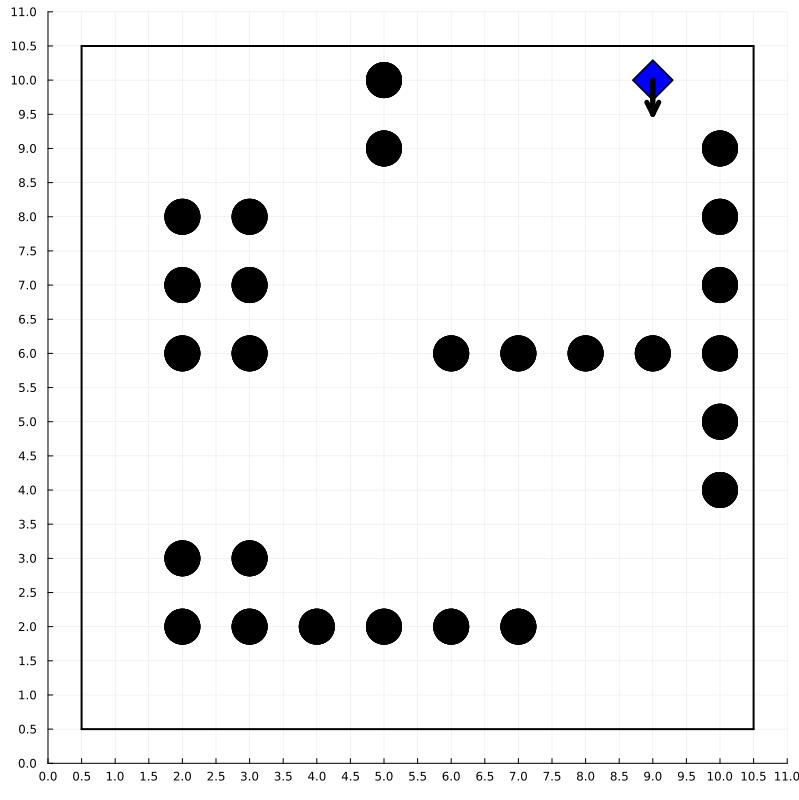

In [138]:
render(mdp,sp)

# Simulations

Now that we have defined the problem, we should simulate it to see it working. The funcion `stepthrough` from `POMDPSimulators` provides a convenient `for` loop syntax for exploring the behavior of the mdp. The `POMDPPolicies` provides a way for defining simple policies, such as `RandomPolicy` or `FunctionPolicy` that takes a lambda function to determine the next action based on the state `s`.

In [139]:
mdp = DroneEnv()
mdp.tprob=1.0

policy = RandomPolicy(mdp)
left_policy = FunctionPolicy(s->:l)
right_policy = FunctionPolicy(s->:r)

for (s,a,r) in stepthrough(mdp, right_policy, "s,a,r", max_steps=10)
    @show s
    @show a
    @show r
    println()
end

## Value Iteration Solver

Value iteration is a dynamic porgramming apporach for solving MDPs. See the [wikipedia](https://en.wikipedia.org/wiki/Markov_decision_process#Value_iteration) article for a brief explanation. The solver can be found [here](https://github.com/JuliaPOMDP/DiscreteValueIteration.jl). If you haven't isntalled the solver yet, you can run the following from the Julia REPL to download the module.

```julia
POMDPs.add("DiscreteValueIteration")
```

Each POMDPs.jl solver provides two data types for you to interface with. The first is the Solver type which contains solver parameters. The second is the Policy type. Let's see hwo we can use them to get an optimal action at a given state.

In [140]:
# first let's load the value iteration module
using DiscreteValueIteration

# initialize the problem
mdp = DroneEnv()

# initialize the solver
# max_iterations: maximum number of iterations value iteration runs for (default is 100)
# belres: the value of Bellman residual used in the solver (defualt is 1e-3)
solver = ValueIterationSolver(max_iterations=100, belres=1e-3; verbose=false)

# solve for an optimal policy
policy = solve(solver, mdp); 

Now, we can use the policy along with the ```action(...)``` function to get the optimal action in a given state.

In [141]:
# say we are in state (9,2)
s = DroneState(9,2, 0.0)
a = action(policy, s)

:bkwd

Remeber that the state (9,3) has an immediate reward of +10.0, so the policy we found is moving up as expected!

In [142]:
s = DroneState(9,10, Float64(pi))
a = action(policy, s)

:bkwd

![description](gw.jpg)

To see the path an agent may take in the gridworld, starting in the initial state (set to `(1,1)`), you may run following code. Note that the policy differs from the example above, as the gridworld in the image has -1 reward for accidentaly trying to move into the wall, which we have not implemented in our MDP.

In [143]:
for (s,a,r) in stepthrough(mdp, policy, "s,a,r", max_steps=20)
    @show s
    @show a
    @show r
    println()
end

## Monte-Carlo Tree Search Solver
Monte-Carlo Tree Search (MCTS) is another MDP solver. It is an online method that looks for the best action from only the current state by building a search tree. A nice overview of MCTS can be found [here](http://www.diego-perez.net/papers/MCTSSurvey.pdf). Run the following command to donwload the module



```julia
POMDPs.add("MCTS")
```

Let's quickly run through an example of using the solver:

In [144]:
using MCTS

# initialize the problem
mdp = DroneEnv()

# initialize the solver with hyper parameters
# n_iterations: the number of iterations that each search runs for
# depth: the depth of the tree (how far away from the current state the algorithm explores)
# exploration constant: this is how much weight to put into exploratory actions. 
# A good rule of thumb is to set the exploration constant to what you expect the upper bound on your average expected reward to be.
solver = MCTSSolver(n_iterations=10000,
                    depth=200,
                    exploration_constant=10.0,
                    enable_tree_vis=true)

# initialize the planner by calling the `solve` function. For online solvers, the 
planner = solve(solver, mdp)

# to get the action:
s = DroneState(9,2, 0.0)
a = action(planner, s)

Let's simulate using the planner to determine a good action at each timestep.

In [ ]:
s = DroneState(1,1, 0.0) # this is our starting state
hist = HistoryRecorder(max_steps=1000)

hist = simulate(hist, mdp, policy, s)

println("Total discounted reward: $(discounted_reward(hist))")

Now we can view the state-action history using the `eachstep` function.

In [ ]:
using Printf
for (s, a, sp) in eachstep(hist, "s,a,sp")
    @printf("s: %-26s  a: %-6s  s': %-26s\n", s, a, sp)
end

To see what the planner is doing, we can look at the tree created when it plans at a particular state, for example, the first state in the history.

In [ ]:
using D3Trees

# first, run the planner on the state
s = state_hist(hist)[1]
a, info = action_info(planner, s);

# show the tree (click the node to expand)
D3Tree(info[:tree], init_expand=1)